In [7]:
import torch
import torch.nn.functional as F
import numpy as np

from pathlib import Path
import matplotlib.pyplot as plt

from infer import sample_features3d, make_4d, make_5d, norm_minmax

In [5]:
vol = torch.from_numpy(np.load('/run/media/dome/SSD/Data/Volumes/CT-ORG/volume-10.npy'))
vol = norm_minmax(vol)

vol torch.Size([512, 512, 501]) torch.float32 tensor(0.) tensor(1.)


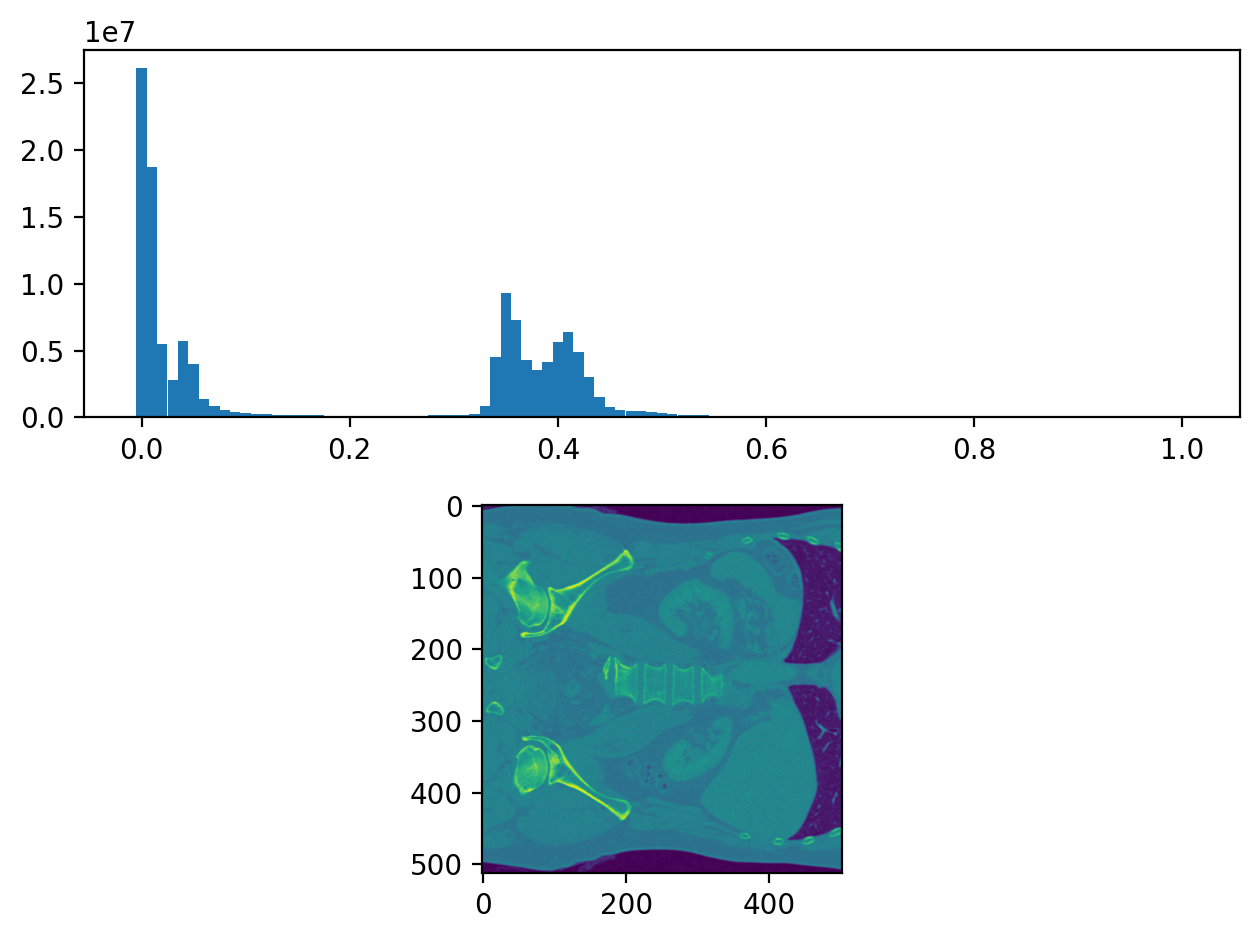

In [15]:
print('vol', vol.shape, vol.dtype, vol.min(), vol.max())
BIN_COUNT=101
hst = vol.histc(bins=BIN_COUNT)

fig, ax = plt.subplots(2,1, dpi=200, tight_layout=True)
ax[0].bar(torch.linspace(0,1,BIN_COUNT), hst, align='center', width=1/BIN_COUNT)
ax[1].imshow(vol[:,255])

In [39]:
def enhance_contrast(data, value, factor=6.0):
    ''' Enhances contrast of `data` for values close to `value`

    Args:
        data (Tensor): Image/Volume to be contrast enhanced with value range [0,1]
        value (float): Value for which contrast shall be enhanced
        factor (float, optional): Strength of contrast enhancement. Defaults to 6.0.

    Returns:
        Tensor: Contrast enhanced image/volume with `value` shifted to 0.5, scaled back to [0,1]
    '''
    return torch.clamp((data - value) * factor + value, 0.0, 1.0)

Text(0.5, 1.0, 'Contrast Enhanced Hist')

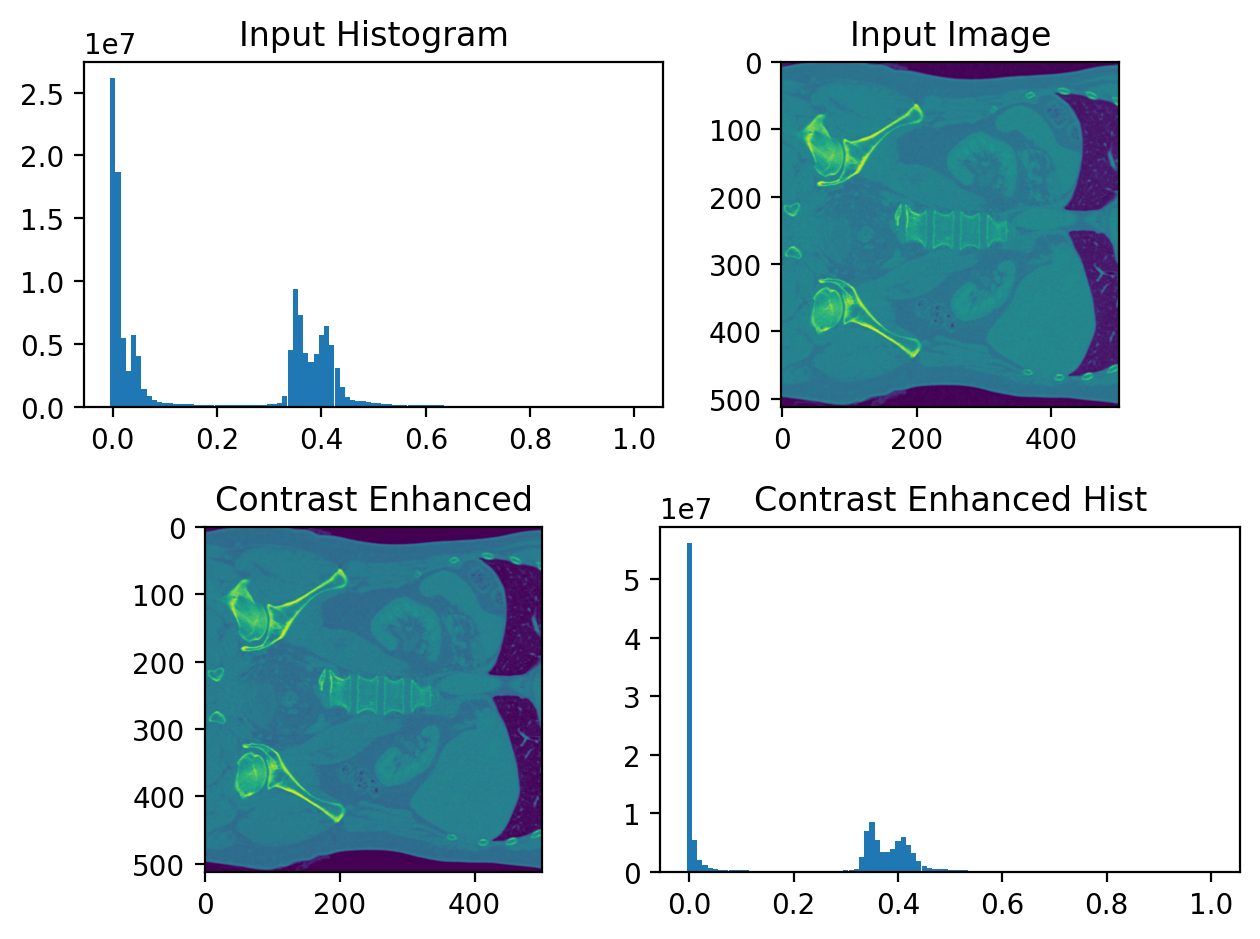

In [54]:
val = 0.4

ce_vol = enhance_contrast(vol, val, factor=1.1)
fig, ax = plt.subplots(2,2, dpi=200, tight_layout=True)
hst1 = vol.histc(bins=BIN_COUNT)
hst2 = ce_vol.histc(bins=BIN_COUNT)

ax[0,0].bar(torch.linspace(0,1,BIN_COUNT), hst1, align='center', width=1/BIN_COUNT)
ax[0,0].set_title('Input Histogram')
ax[0,1].imshow(vol[:,255])
ax[0,1].set_title('Input Image')
ax[1,0].imshow(ce_vol[:, 255])
ax[1,0].set_title('Contrast Enhanced')
ax[1,1].bar(torch.linspace(0,1,BIN_COUNT), hst2, align='center', width=1/BIN_COUNT)
ax[1,1].set_title('Contrast Enhanced Hist')
